# Earthquake Prediction using numpy
## Author : D.Vamsi Krishnam Raju
# License and copyrights
MIT License

Copyright (c) 2022 versatiledvkr

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Import libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Pre-processing

In [2]:
# read the data from dataset
earthquake_data = pd.read_excel('Earthquake.xlsx')


In [5]:
earthquake_data.head()

,Year,Sunspots
0,1701,8.3
1,1702,18.3
2,1703,26.7
3,1704,38.3
4,1705,60.0


## Fourier transform of the sunspot data

In [6]:
A = np.fft.fft(np.array(earthquake_data['Sunspots']))

## Size of an array 

In [11]:
sample = earthquake_data['Sunspots']
n= sample.size
n

319

## Frequency of given data

In [10]:
freq = np.fft.fftfreq(n,1)
freq

array([ 0.        ,  0.0031348 ,  0.00626959,  0.00940439,  0.01253918,
        0.01567398,  0.01880878,  0.02194357,  0.02507837,  0.02821317,
        0.03134796,  0.03448276,  0.03761755,  0.04075235,  0.04388715,
        0.04702194,  0.05015674,  0.05329154,  0.05642633,  0.05956113,
        0.06269592,  0.06583072,  0.06896552,  0.07210031,  0.07523511,
        0.07836991,  0.0815047 ,  0.0846395 ,  0.08777429,  0.09090909,
        0.09404389,  0.09717868,  0.10031348,  0.10344828,  0.10658307,
        0.10971787,  0.11285266,  0.11598746,  0.11912226,  0.12225705,
        0.12539185,  0.12852665,  0.13166144,  0.13479624,  0.13793103,
        0.14106583,  0.14420063,  0.14733542,  0.15047022,  0.15360502,
        0.15673981,  0.15987461,  0.1630094 ,  0.1661442 ,  0.169279  ,
        0.17241379,  0.17554859,  0.17868339,  0.18181818,  0.18495298,
        0.18808777,  0.19122257,  0.19435737,  0.19749216,  0.20062696,
        0.20376176,  0.20689655,  0.21003135,  0.21316614,  0.21

## True theoretical fft

In [13]:
fft_theoretical = 2*np.abs(A/n)
fft_theoretical[0] = 0 #ignoring 0 hZ because it seems to be an outliner
fft_theoretical

array([ 0.        ,  6.92360063, 11.88672999, 25.30572096,  9.70695156,
       11.79455028, 17.09140835,  7.06640382,  4.10512885,  2.23262647,
        3.60756669,  6.6006785 ,  4.60528869,  3.46099125,  1.31130565,
        9.25607274,  0.22683963,  5.34708919,  2.02750541,  5.31543966,
        2.78027872,  7.71222758,  3.27434474,  8.11494377,  8.15268129,
        6.63046965,  7.30989573, 21.51675555,  7.23203692, 47.54555338,
       28.53777369,  3.16443112, 31.23567589,  4.89388471,  7.99924984,
        4.29507211,  9.46858369,  5.27313646, 13.06148743, 11.72111535,
        5.46906964,  4.1953163 ,  4.36835902,  4.8915031 ,  3.44943595,
        3.92644215,  1.54997872,  2.97905967,  2.04809073,  1.11863907,
        1.9513007 ,  1.1139193 ,  1.71417206,  2.57130144,  3.92841539,
        4.22966369,  6.86014076,  1.71243451,  7.82679857,  3.41276187,
        2.50842966,  5.09684501,  4.60836408,  0.35325432,  3.16982609,
        0.81938402,  4.99211209,  2.30868034,  2.88875784,  1.70

## Filtering Frequencies

In [14]:
mask = freq>0
mask

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Time domain Representation


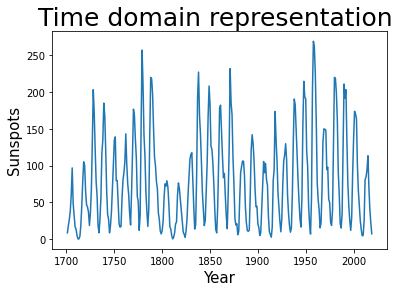

In [15]:
plt.figure(1)  ## Time domain representation
plt.plot(earthquake_data.Year, earthquake_data.Sunspots)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Sunspots',fontsize=15)
plt.title('Time domain representation ',fontsize=25)
plt.show()


## Frequency Domain Represntation

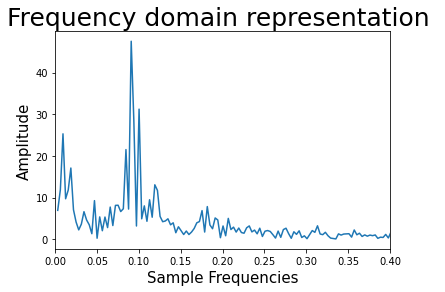

In [16]:
plt.figure(1)  ## Frequency domain representation
plt.plot(freq[mask], fft_theoretical[mask])  ## Frequency domain representation 
plt.xlim([0, 0.4])
plt.xlabel('Sample Frequencies',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Frequency domain representation ',fontsize=25)
plt.show()

In [1]:
print("....Done")

....Done
